# Pymaceuticals Inc.
---
Resources Used- AskBCs, TA, Python Reading Materials.
### Analysis

- Capomulin, Ramicane seems to be the most effective to reduce the tumorsize
- Sample Sizes are all fairly similiar
- Capomulin decrease the tumor size effectively but after 40 days the tumor size is incline to increase. (Longer Observation Data Set is Needed to see true effectiveness)
- The Higher the weight of the mouse, the larger the tumor size 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice=merged_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_found = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_unique=pd.DataFrame(unique_found)
all_unique

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Removing any information that is false for the clean up 
clean_data = merged_data[merged_data['Mouse ID'].isin(all_unique)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
#Count nd_mice = no duplicates
nd_mice=clean_data["Mouse ID"].value_counts()
nd_mice_count=len(nd_mice)
nd_mice

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    "Mean Tumor Volume":means,
    "Median Tumor Volume":medians,
    "Tumor Volume Variance":variances,
    "Tumor Volume Std. Dev.":stds,
    "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_adv = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table_adv

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

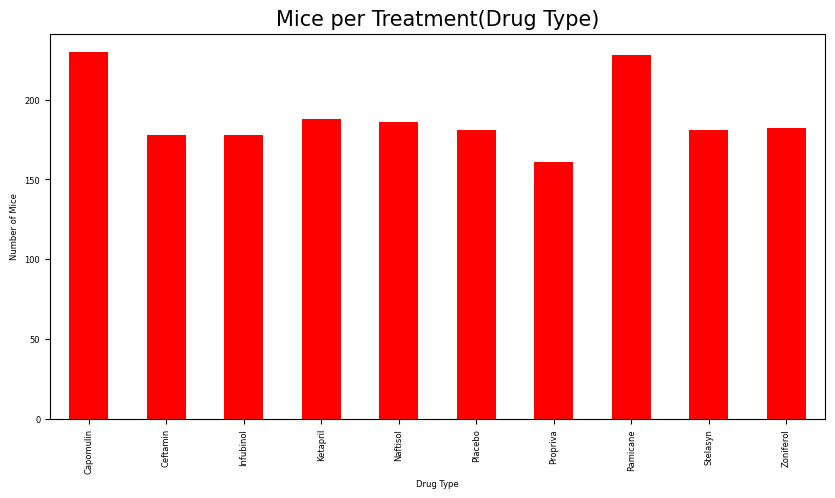

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice_treatment = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
#Plot Using Pandas
plot_pandas = count_mice_treatment.plot.bar(figsize=(10,5), color='r',fontsize = 6)
#Create Bar Plot
plt.xlabel("Drug Type",fontsize = 6)
plt.ylabel("Number of Mice",fontsize = 6)
plt.title("Mice per Treatment(Drug Type)",fontsize = 15)
#Display
plt.show()

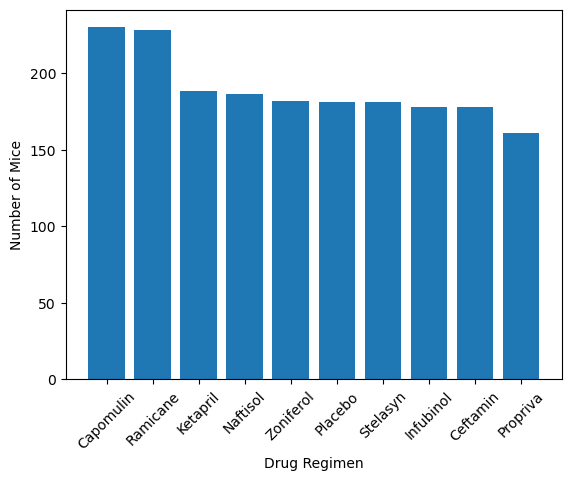

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = clean_data["Drug Regimen"].value_counts()
#Create pyplot
plt.bar(drug_regimen_count.index.values, drug_regimen_count.values)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#Display
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas 
#Step 1 - Count
# Group by
groupby_gender = clean_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create Gender Count
gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]

# gender_df
gender

,Total Count
Sex,
Female,124
Male,125


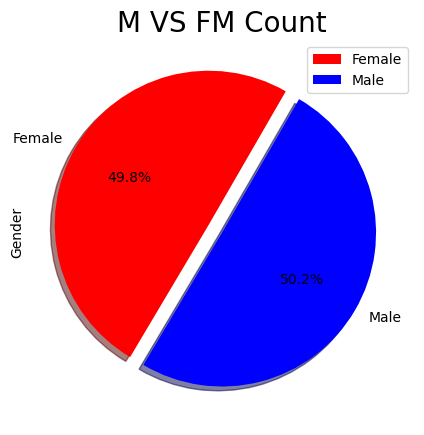

In [12]:
#Step 2 - Create Pie Plot (Pandas)
colors = ['red', 'blue']
explode = (0.1, 0)
plot = gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=60, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('M VS FM Count',fontsize = 20)
plt.ylabel('Gender')
plt.show()

Text(0, 0.5, 'Gender')

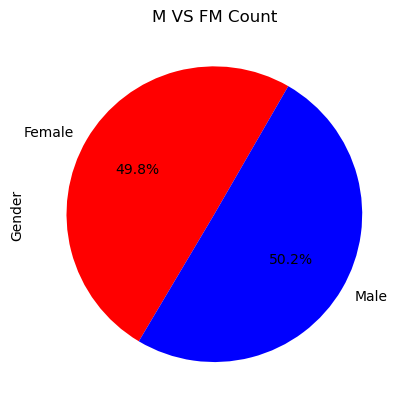

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
colors = ['red', 'blue']
sizes = [49.799197,50.200803]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=60)
plt.title('M VS FM Count')
plt.ylabel('Gender')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
medication_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
medication = clean_data[clean_data["Drug Regimen"].isin(medication_list)]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = medication.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
greatest_timepoint = greatest_timepoint.stack(level=0).unstack(level=0)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
medication = clean_data[clean_data["Drug Regimen"].isin(medication_list)]
medication.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = 0
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for medication in medication_list:
    quartiles = greatest_timepoint[medication].quantile([.25,.5,.75]).round(2)
# Determine outliers using upper and lower bounds
    upperq = quartiles[0.75].round(2)
    lowerq = quartiles[0.25].round(2)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The upper quartile of {medication} treatments is: {upperq}")
    print(f"The lower quartile of {medication} treatments is: {lowerq}")
    print(f"The interquartile range of {medication} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {medication} outliers.")
    print(f"Values above {upper_bound} could be {medication} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The upper quartile of Capomulin treatments is: 40.16
The lower quartile of Capomulin treatments is: 32.38
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The upper quartile of Ramicane treatments is: 40.66
The lower quartile of Ramicane treatments is: 31.56
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The upper quartile of Infubinol treatments is: 65.53
The lower quartile of Infubinol treatments is: 54.05
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

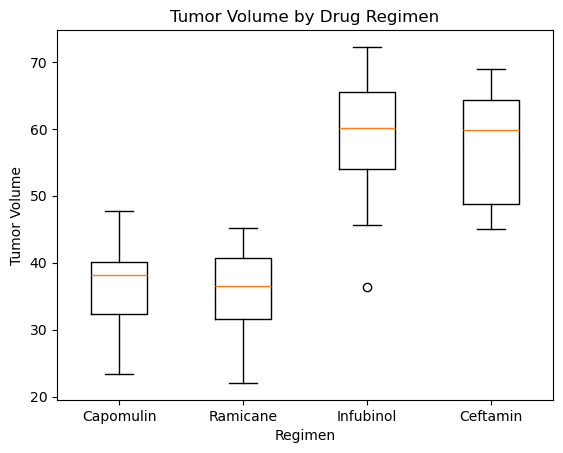

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = []
for medication in medication_list:
    tumor_vol_data.append(list(greatest_timepoint[medication].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(tumor_vol_data, labels = medication_list)
plt.show()

In [17]:
#Clarify Data for Capomulin
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

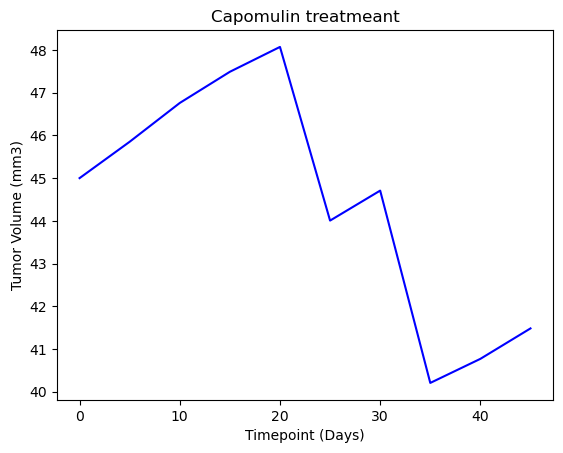

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant')
plt.plot(x_axis, tumsiz, markersize=20,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

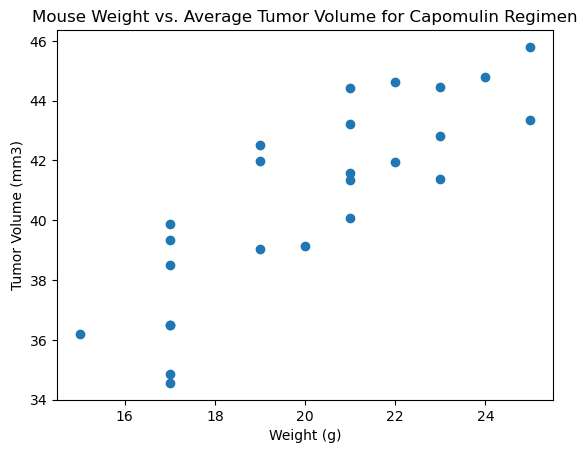

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Capomulin Data Mean(Average)
avg_tumor_volume_capomulin = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#Merge Data
capomulin_data = pd.merge(avg_tumor_volume_capomulin, mouse_metadata, on="Mouse ID")
#Figure
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker="o")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


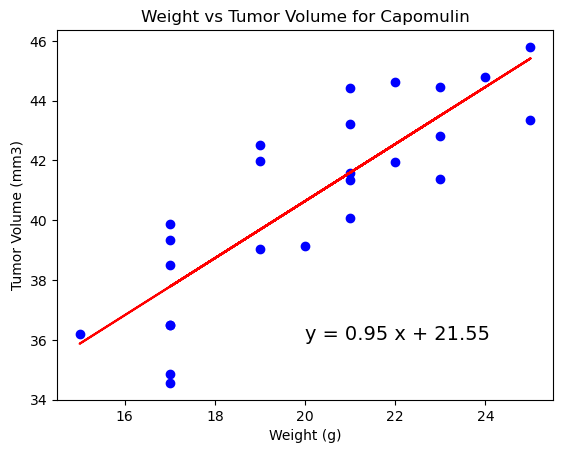

In [20]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capomulin_data['Weight (g)'],capomulin_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"])
regress_values=capomulin_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
#Figure
plt.scatter(capomulin_data["Weight (g)"],capomulin_data["Tumor Volume (mm3)"],color='b')
plt.plot(capomulin_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()